<a href="https://colab.research.google.com/github/GaneshM2714/Tumir_Detection_ml/blob/main/Brain_Tumor_Overfit_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import glob
from sklearn.utils import shuffle
import os


In [72]:
def crop_brain_contour(image, plot=False):

    import imutils
    import cv2
    from matplotlib import pyplot as plt

    # Convert the image to grayscale, and blur it slightly
    gray = cv2.GaussianBlur(image, (5, 5), 0) # Changed "gray" to "image"

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)


    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.subplot(122)
        plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
        plt.title("Cropped Image")
        plt.show()

    return new_image

In [88]:
def load_data(dir_list):
  X=[]
  y=[]

  for directory in dir_list:
    for img_path in glob.glob(os.path.join(directory, '*.jpg')):
      # print(img_path)
      # img = cv2.imread(img_path, 0)
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (256, 256),interpolation=cv2.INTER_CUBIC)
      img = crop_brain_contour(img, plot=False)
      img = img/255.0
      img = cv2.resize(img, (256, 256),interpolation=cv2.INTER_CUBIC)
      X.append(img)
      if directory == 'yes':
        y.append([1])
      else:
        y.append([0])


  X = np.array(X)
  y = np.array(y)
  X, y = shuffle(X, y)

  print(f'Number of examples is: {len(X)}')
  print(f'X shape is: {X.shape}')
  print(f'y shape is: {y.shape}')

  return X, y



In [89]:
X,y = load_data(['yes','no'])


Number of examples is: 171
X shape is: (171, 256, 256)
y shape is: (171, 1)


In [100]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split

In [98]:
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [108]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [110]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 1.0000 - loss: 0.0269 - val_accuracy: 0.7429 - val_loss: 0.5401
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0161 - val_accuracy: 0.8000 - val_loss: 0.5425
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.7714 - val_loss: 0.6457
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.8286 - val_loss: 0.6000
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8286 - val_loss: 0.6163
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8286 - val_loss: 0.6685
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 1.0000 - loss: 9.6161e-04 - val_accuracy: 0.8286 - val_loss: 0.6854
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 7.4640e-04 - val_accuracy: 0.8286 - val_loss: 0.6903


In [114]:
history = model.history.history

In [112]:
for key in history.keys():
    print(key)

accuracy
loss
val_accuracy
val_loss


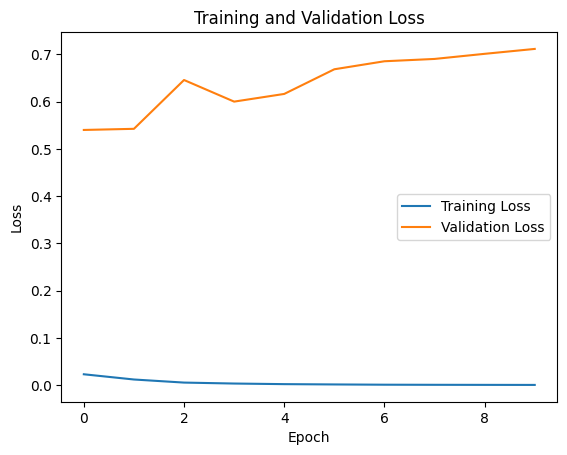

In [116]:
# Assuming you have the training history stored in a variable called 'history'
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()